<a href="https://colab.research.google.com/github/reflectormensah/Financial-Engineering-Data-Science/blob/main/Scatter%20Plotts%20%26%20Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### STATISTICAL RELATED RISK; CORRELATION

SECTION 1

#### Definition
Correlation is seen as a statistical measure which expresses the direction and extent to which two variable classes are related[1]. It is a simple relationship metric for only two datasets. The direction may be positive where they all move together in increasing or decreasing together. The coefficienct of positive direction may be "0 < n < 1", where 'n' is the coefficient result. Also, n = 1 meaning that, they are positively perfectly related. Thus, as dataset A increases; dataset B also increases in the same way.

On the other hand, correlation may also reveal negative relationship between 2 datasets as they move in positive directions. Thus, as dataset A increases; dataset B is decreasing, and vice versa. The coefficienct of the negative direction may be "-1 < n < 0", where 'n' is the coefficient result. Also, n = -1 meaning that, they are negatively perfectly related. The closer they get to 1 or -1, the stronger the relationship.

We tackled only 3 forms of correlation[2], namely:
 1. *Spearman Rank Correlaion*, a non-parametric correlation using ranks with the two datasets beng monotonic.
2. *Pearson Correlation*, a parametric and product-moment linear measurement of two datasets.
3. *Kendall Rank Correlation*, an alternating pearson corelation but non-parametric. Also more preferable to Spearman correlation when sample size is relatively small and have many ranks.

# Equations and Formulas

1. Spearman Rank Correlation

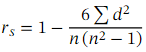

r${_s}$( sometimes *ρ*) = correlation coefficient

n = number of samples in the dataset

d = difference in the ranks of the two coordinates in the dataset for each point i.e *(x,y)*

2. Pearson Correlation

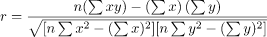

OR


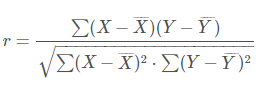

where,

*r* = correlation coefficient

𝜮X, ΣY or 𝜮XY = Total values of X, Y or XY respectively

X̄ and Ȳ = mean of the values of X and Y respectively in the sample

3. Kendell Rank Correlation


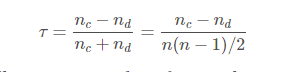

variables;

n${_c}$ = number of concordant pairs

n${_d}$ = number of discordant pairs

n = number of pairs



**Source; Reference 2*

###Diagrams

The below image shows the various from of correlations

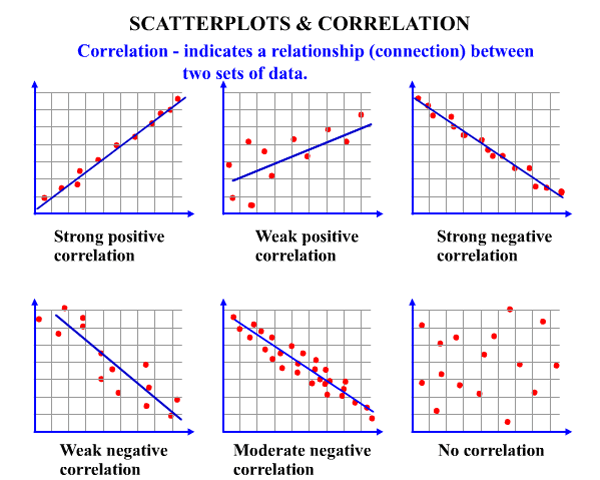


**Source https://www.aplustopper.com/scatter-plots-correlation/*

1. *Strong Positive Correlation* ; This means that the two datasets are likely moving in the same direction at a closer pace. This would normally return a correlation coefficient close to 1.

2. *Weak Positive Correlation* ; This means that the two datasets are likely moving in the same direction but not a closer pace. This would normally return a correlation coefficient close to 0.

3. *Strong Negative Correlation* ; This means that the two datasets are likely moving in the opposite direction at a closer pace. This would normally return a correlation coefficient close to -1.

4. *Weak Negative Correlation* ; This means that the two datasets are likely moving in the opposite direction and also a distanced pace. This would normally return a correlation coefficient approaching 0, from -1.

5. *Moderate Negative Correlation* ; This corelation lies between weak negative and strong negative correlations. This would normally return a correlation coefficient close to -0.5.

6. *No Correlation* ; This means that the two datasets are likely moving in the different directions without the effect of the other.. This would normally return a correlation coefficient of 0. There is no relationship between the two datasets under consideration.


  Empirically, it is hardly to get some two forms of correlations, namely;

a. *Perfect Positive Correlation* : This means that the two datasets are fully moving in the same direction at the same pace. This would normally return a correlation coefficient of exactly 1.

b. *Perfect Negative Correlation* : This means that the two datasets are moving in the exact opposite direction at the same pace. This would normally return a correlation coefficient of exactly -1.



# SECTION 2

In [ ]:
# importing the important libraries

! pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import statsmodels.api as sm
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns

# setting the dates, Two months
start_date = "2019-10-01"
end_date = "2019-11-30"

# gEtting historical Data and merging them
data_etf = yf.download("ISFD.L IGLN.L", start=start_date, end=end_date).reset_index()
data_etf["Date"] = [ ele.date() for ele in data_etf["Date"] ]
data_etf = data_etf.set_index("Date")
data_etf = data_etf[["Date", "Adj Close"]]
data_etf.columns = [ x.replace(".L","") for x in data_etf.columns.get_level_values(1) ]
data_etf = data_etf.reset_index()

data_ir = pdr.DataReader(['DGS2', 'DGS3', 'DGS5', 'DGS7', 'DGS10', 'DGS30'], 'fred', start_date, end_date).fillna(method='ffill').reset_index().rename(columns={"DATE": "Date"})
data_ir["Date"] = [ ele.date() for ele in data_ir["Date"] ]
data_ir = data_ir.rename(columns={'DGS2':"2Y", 'DGS3':"3Y", 'DGS5':"5Y", 'DGS7':"7Y", 'DGS10':"10Y", 'DGS30':"30Y"})

assert len(data_etf["Date"])==len(data_ir["Date"])

data_full = data_etf.merge(data_ir, left_on="Date", right_on="Date", how="outer")

data_full = data_full[['IGLN', 'ISFD']].dropna()

[*********************100%***********************]  2 of 2 completed


In [ ]:
data_full.head()

,IGLN,ISFD
0,29.067499,5.4850
1,29.417500,5.3080
2,29.562500,5.2765
3,29.440001,5.3400
4,29.367500,5.3700


In [ ]:
# Performing correlation on the dataset

print(data_full.corr(), '\n')  #using pearson correlation

print(" COrrelation coefficient using pearson method = -0.650056")


          IGLN      ISFD
IGLN  1.000000 -0.650056
ISFD -0.650056  1.000000 

 COrrelation coefficient using pearson method = -0.650056


In [ ]:
print(data_full.corr(method="spearman"),'\n') # using spearman rank correlation

print(" COrrelation coefficient using spearman method = -0.65003")

         IGLN     ISFD
IGLN  1.00000 -0.65003
ISFD -0.65003  1.00000 

 COrrelation coefficient using spearman method = -0.65003


In [ ]:
print(data_full.corr(method="kendall"),'\n') # using the kendall rank correlation

print(" COrrelation coefficient using kendall rank method = -0.494693")

          IGLN      ISFD
IGLN  1.000000 -0.494693
ISFD -0.494693  1.000000 

 COrrelation coefficient using kendall rank method = -0.494693


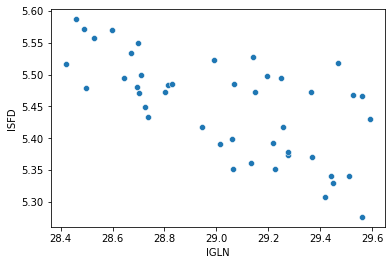

In [ ]:
# Plotting the graph using CORRELATION
sns.scatterplot(data=data_full, x='IGLN', y='ISFD')


From the above scatter plot, we can see the negative relationship between IGLN and ISFD

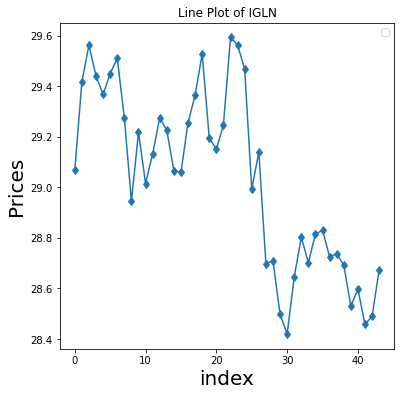

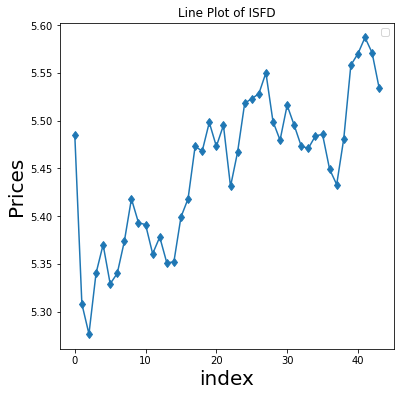

In [ ]:
#Plotting without correlation "IGLN"
plt.figure(figsize=(6,6))
plt.title('Line Plot of IGLN')
plt.xlabel('index', fontsize=20)
plt.ylabel('Prices',fontsize=20)
plt.plot(data_full.index, data_full['IGLN'], markevery=1, marker='d')
plt.legend()
plt.show()

#Plotting without correlation "ISFD"
plt.figure(figsize=(6,6))
plt.title('Line Plot of ISFD')
plt.xlabel('index', fontsize=20)
plt.ylabel('Prices',fontsize=20)
plt.plot(data_full.index, data_full['ISFD'], markevery=1, marker='d')
plt.legend()
plt.show()




# SECTION 3

In the field of finance, measuring risk on assets and portfolios accounts on the variability abd relationship(or correlation) of the assets involved. However, the financial or market analysts encounter problems in periods of high market volatilities; because, returns on assets becomes difficult in estimating. Loretan & English(1998) claims that a similar event occured following the Russian default in 1994. A risk manager in the financial firms notes that in times of hightened market, correlations change unexpectedly. In the same paper, it followed that a big investment banking giant, JP Morgan also confessed that such major market events pose "breakdowns in correlation" and higher volatility. In this regard, a model(s) would have to be used to establish relationships and capture various avenues of managing risk.
So the paper dwelled on the "correlation breakdown" to demonstrate the empirical use of correlation over time and effects on volatility and asset returns.

On the relationship between volatility and correlation, it was figured out that in a bivariate normal random distribution, the correlation of high volatility can be affect the main corrrelation of the distribution. In economic data, correlation and volatilities are observed in time series. It ideally measures the variability of the data and also how data affects correlations. For instance, in the general linear regression model, *y = xt + ut* ,  with  *Cov(xt ,ut ) = 0* and *t = 1,2,…,* then we can conclude a sampling correlation coefficient
between x and y, for a sample of size n, as

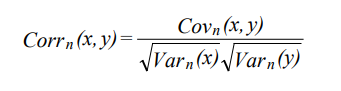

where *n* is the sample as opposed with the population.

For financial time series, the writer mentioned that analysts often find that the mean of y$_{t}$ is near a linear function of x$_{t}$, and that
Cov$_{n}$ (x$_{t}$ ,u$_{t}$ ) ≈ 0 also being reasonable assumption to make. However, even when the x and u levels are
fairly uncorrelated, their variances may well be serially, like contemporaneously,
correlated. Hence, the term Var$_{n}$ (u) could move step-by-step across subsamples with the sampling
variance of x. Taking, for instance, β> 0 and that the contemporaneous volatilities of x and u
(and hence the contemporaneous volatilities of x and y) are directly correlated. It will conclude that, time intervals
exhibiting a high sampling variability of x will also tend to have larger than average values for Var$_{n}$
(u). Consequently, the sampling correlation between x and y will deviate less from its population
value on average.

### Real-world Example

The researcher considered the asset classes of Financial Times 100, DAX, UK and German 10-Notes,etc as shown in the table to evaluate the importance of correlattion and volatility and their relationship in the analysis.

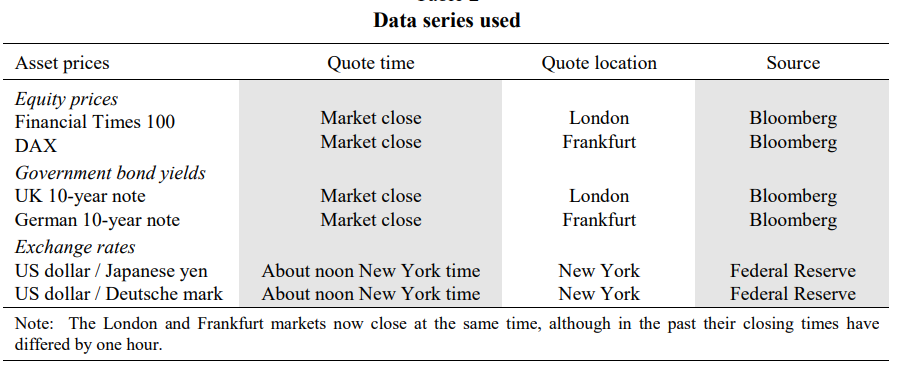

**Source https://www.bis.org/publ/confer08k.pdf*





The returns on equity holdings and foreign exchange are the daily percentage changes in ther prices.

The below figures portray time series plots of within-quarter variances and correlations.

From *figure 2*, it is clear that last fall shows a period of high volatility and thus, that is a high correlation between two returns.

From *figure 3*, it shows that returns on bond investments werer somehow volatile with last fall with high end range of correlation between 1998 quarters 3 and 4.

From *figure 4*, movement of the dollar/yen and dollar/mark exchange were of no stringent high correlation last fall despite the high volatility

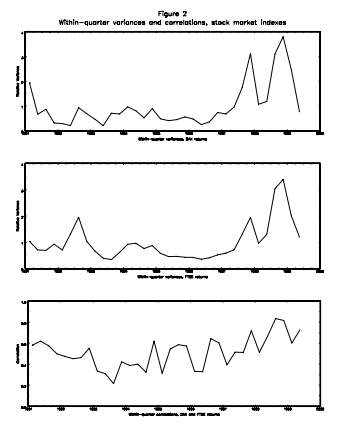
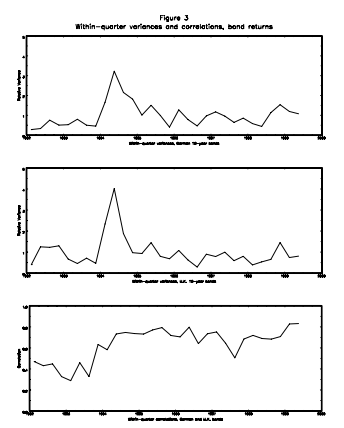
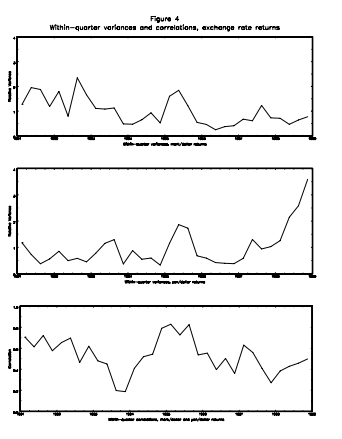

The research paper emphasises that financial researchers and supervisors should be pay attention to volatilities and correlations when evaluating a firm's risk management. Also, also it is a good metric in finance, short interval of data on correlations needs appropriate tests for improved accuracy.
Also, monetary policymakers should pay attention to the relationship of correlation and volatities in the financial markets for predicting turbulence and other significant market events.

# References
1. https://www.jmp.com/en_ca/statistics-knowledge-portal/what-is-correlation.html
2. https://www.kaggle.com/code/kiyoung1027/correlation-pearson-spearman-and-kendall/report
3. https://www.aplustopper.com/scatter-plots-correlation/
4. "Evaluating "Correlation Breakdowns" during periods of market volatility", By M. Loretan & W.B., English. From https://www.bis.org/publ/confer08k.pdf

5. https://www.investopedia.com/articles/investing/032715/what-volatility-and-how-it-affects-you.asp

6. https://www.investopedia.com/articles/investing/102715/how-use-correlation-reduce-portfolio-risk.asp

7. https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/volatility-vol/

8. https://www.moneycontrol.com/news/business/markets/types-of-volatility-and-how-they-can-help-you-in-option-writing-trades-7093201.html

9. https://www.ecb.europa.eu/paym/coll/risk/html/index.en.html

10. https://www.investopedia.com/terms/f/financialrisk.asp

11. ͞Geary W. Sikich,2015. What is Collateral Risk; and Why Should I be Worried About It?͟Retrieved on 18th of October, 2022 from https://www.academia.edu/14430796/What_is_Collateral_Risk_and_Why_Should_I_be_Worried_About_it